# Project: Investigate a Dataset - [NoShowAppointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

### Question for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [2]:
#implmeting all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section I will upload the data and exploring the data


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
# exploring the data type and if there any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There's no missing data

In [6]:
# exploring the data dimensions
df.shape

(110527, 14)

In [7]:
# check for the number of uniques value on "PatientID"
df['PatientId'].nunique()

62299

In [8]:
# check for the number of duplicated value on "PatientID"
df['PatientId'].duplicated().sum()

48228

In [9]:
# check if there any duplication in PatientID & No-show 
# check if there any PatientID duplicated but diffrent in No-show
df.duplicated(['PatientId' , 'No-show']).sum()

38710

In [10]:
# exploring the summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The -1 age is an error data.

In [11]:
# Recognise the row index of age = -1
df_age = df.query ('Age == -1')
df_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
> This section I will edit the data and remving any error data.

In [4]:
# removing the age = -1 value for a
df.drop(index = 99832 , inplace = True)

In [7]:
# expolring the summary of data after removing the age = -1
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# correction of columns names [No-show , Hipertension]
df.rename(columns = {'No-show':'No_show'} , inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'} , inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The No_show to be smiller with SMS_received and Hypertension splling correcation.

In [6]:
# removing duplicated PatientId with with No_show, as the the same PatientId may have multiple of appointments
df.drop_duplicates(['PatientId' , 'No_show'] , inplace = True)

In [12]:
# exploring the data dimensions
df.shape

(71816, 14)

In [7]:
# removing unwanted data
df.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>  Now that I have trimmed and cleaned the data, I'm ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section. 

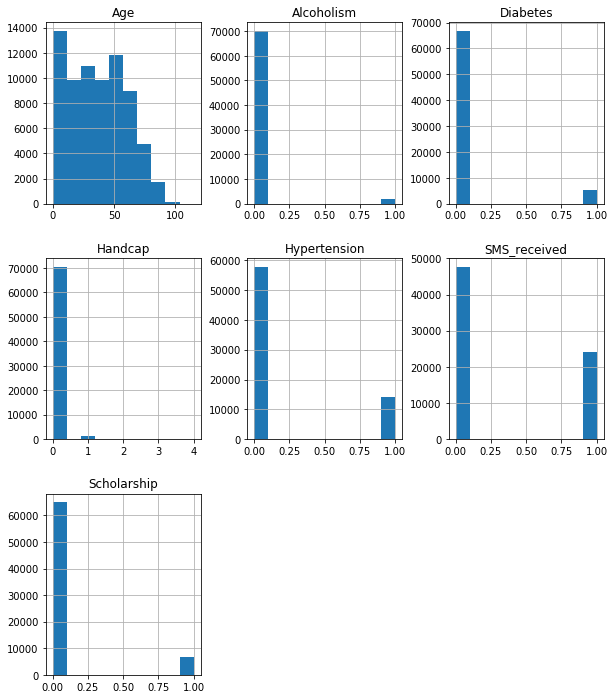

In [31]:
# visualization general data
df.hist(figsize = (10 , 12));

In [8]:
# dividing the patients into two groups reference to Show or NoShow
Show = df.No_show == 'No'
NoShow = df.No_show == 'Yes'

In [33]:
# exploring the first group Show
df[Show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

In [34]:
# exploring the second group NoShow
df[NoShow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

The number of show is almost three times greater then NoShow

In [35]:
# check for the mean of first group Show
df[Show].mean()

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64

In [47]:
# check for the mean of second group NoShow
df[NoShow].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

The first group Show mean age is higher then second group NoShow

### Investigation for the influencing factors on the attendance rate

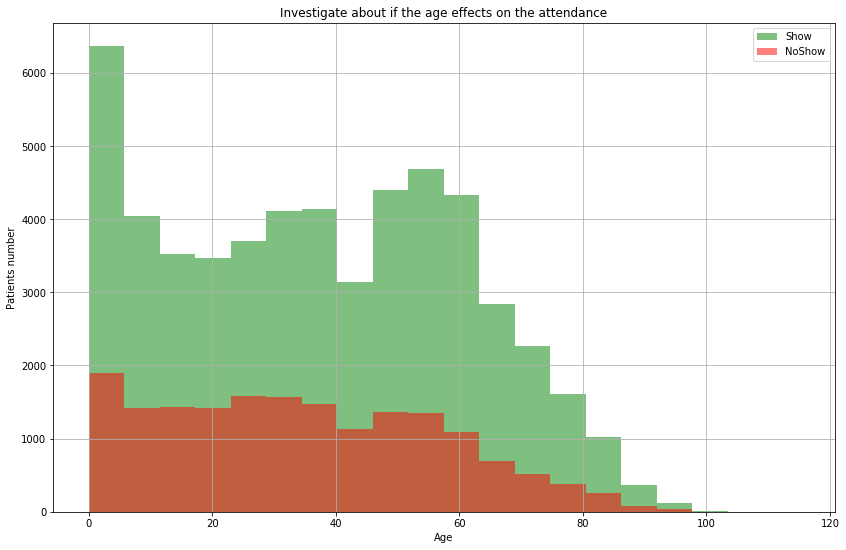

In [11]:
plt.figure(figsize = [14,9])
df.Age[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.Age[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Investigate about if the age effects on the attendance')
plt.xlabel('Age')
plt.ylabel('Patients number');

The ages from 0-5 are the highest since ages of kids, and from 43-57 get lower and last for who's age above 63 get the lowests since ages of old pepole.

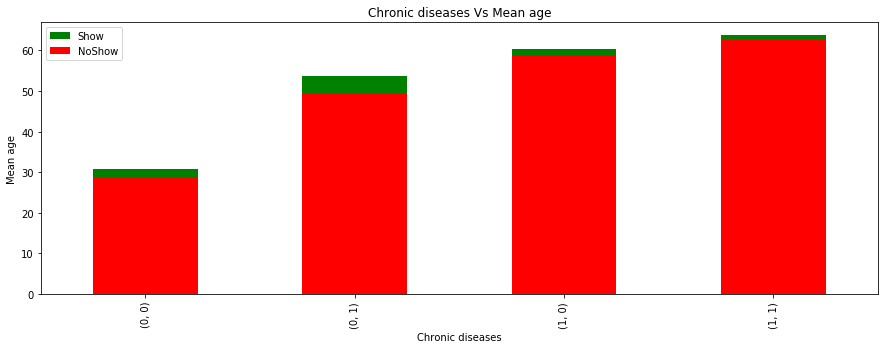

In [13]:
# ivestigate about if the age and chronic diseases effects on the attendence together
plt.figure(figsize = [15,5])
df[Show].groupby(['Hypertension' , 'Diabetes']).mean()['Age'].plot(kind='bar' , color='green' , label='Show')
df[NoShow].groupby(['Hypertension' , 'Diabetes']).mean()['Age'].plot(kind='bar' , color='red' , label='NoShow')
plt.legend();
plt.title('Chronic diseases Vs Mean age')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean age');

The first bar none chronic diseases for Show mean age is about 30 year and about 29 year for NoShow. The second bar there's hypertension and no diabetes for Show mean age is about 54 year and about 49 year for NoShow. The thrid bar there's diabetes and no hypertension for Show mean age is about 60 year and about 59 year for NoShow. The last bar chronic dieseases for Show mean age is about 64 year and 63 year for NoShow.

Note: Most of them are NoShow

In [14]:
# exploring the mean age for group 1 Show.
df[Show].groupby(['Hypertension' , 'Diabetes']).mean()['Age']

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [15]:
# exploring the mean age for group 2 NoShow.
df[NoShow].groupby(['Hypertension' , 'Diabetes']).mean()['Age']

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

As mentioned in the markdown above on the graph, shows there's a effect between age and chronic diseases. On other hand there's no effect between chronic diseases and attendence.

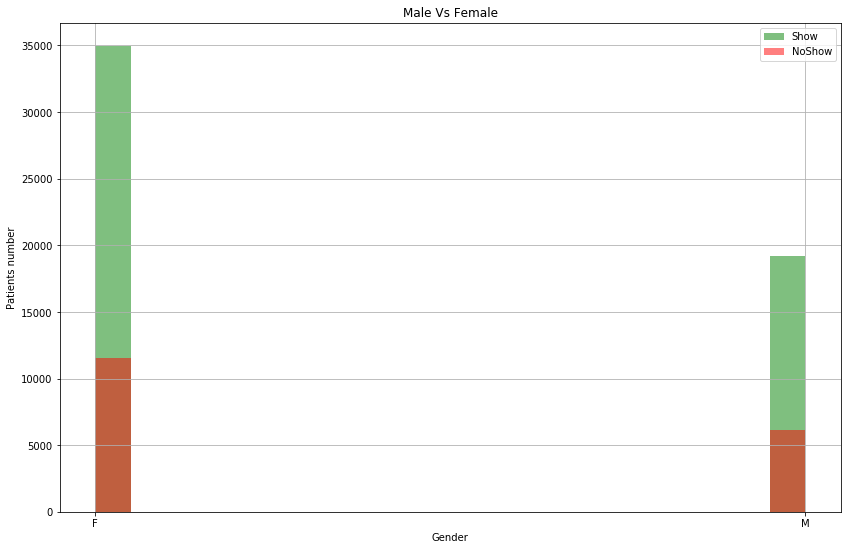

In [15]:
# insetgation if the the gender effects on attendence
plt.figure(figsize = [14,9])
df.Gender[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.Gender[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Male Vs Female')
plt.xlabel('Gender')
plt.ylabel('Patients number');

In [29]:
print (df.Gender[Show].value_counts())

F    34960
M    19193
Name: Gender, dtype: int64


In [30]:
print (df.Gender[NoShow].value_counts())

F    11506
M     6157
Name: Gender, dtype: int64


There's no clear effect between gender and attendace.

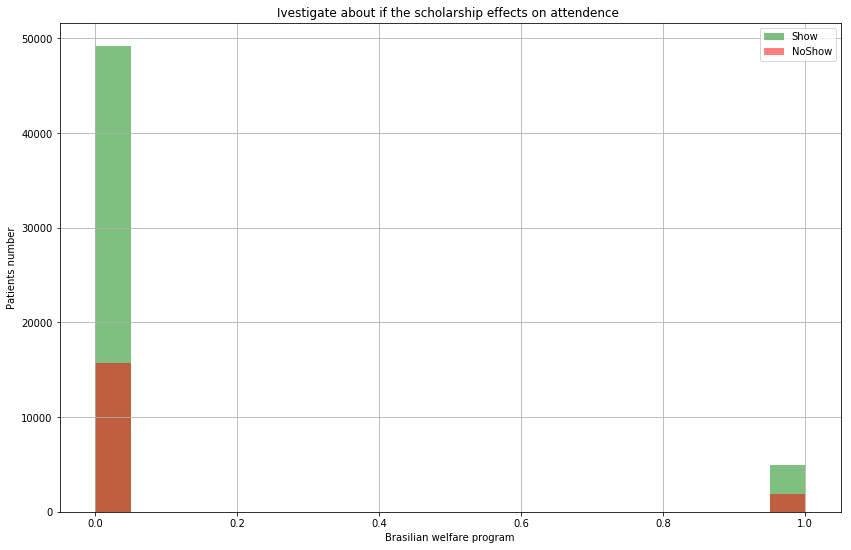

In [42]:
# ivestigate about if the scholarship effects on attendence
plt.figure(figsize = [14,9])
df.Scholarship[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.Scholarship[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Ivestigate about if the scholarship effects on attendence ')
plt.xlabel('Brasilian welfare program')
plt.ylabel('Patients number');

In [33]:
print (df.Scholarship[Show].value_counts())

0    49207
1     4946
Name: Scholarship, dtype: int64


In [34]:
print (df.Scholarship[NoShow].value_counts())

0    15748
1     1915
Name: Scholarship, dtype: int64


There's no clear effects between scholarship and attendace.

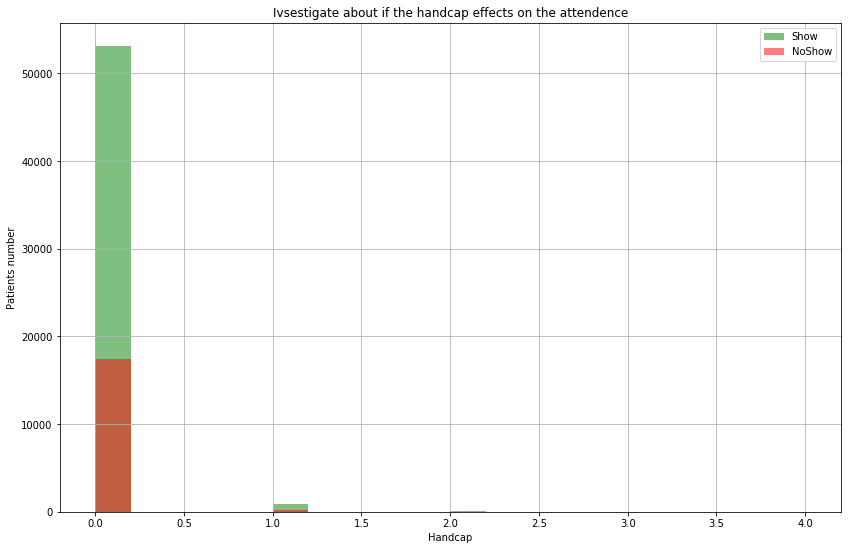

In [39]:
# ivsestigate about if the handcap effects on the attendence
plt.figure(figsize = [14,9])
df.Handcap[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.Handcap[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Ivsestigate about if the handcap effects on the attendence')
plt.xlabel('Handcap')
plt.ylabel('Patients number');

In [40]:
print (df.Handcap[Show].value_counts())

0    53126
1      931
2       89
3        5
4        2
Name: Handcap, dtype: int64


In [41]:
print (df.Handcap[NoShow].value_counts())

0    17385
1      247
2       27
3        3
4        1
Name: Handcap, dtype: int64


There's no clear effects between handcap and attendace.

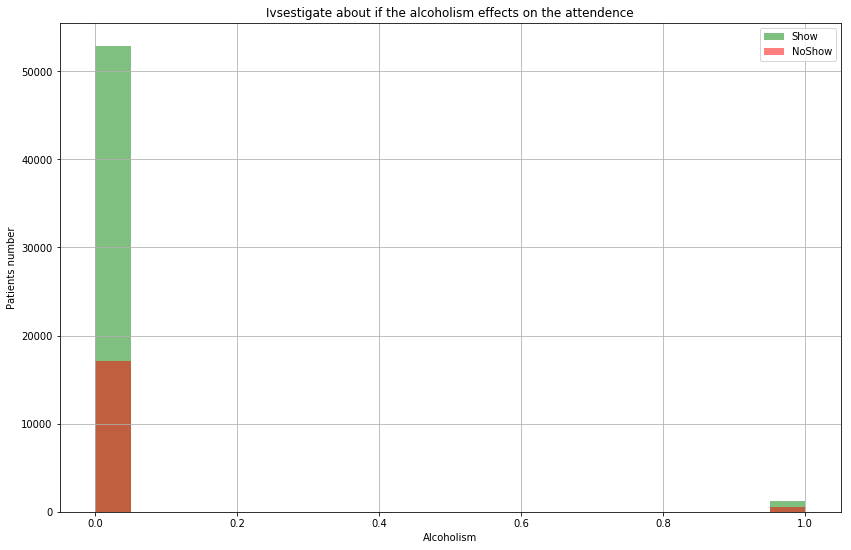

In [9]:
# ivsestigate about if the alcoholism effects on the attendence
plt.figure(figsize = [14,9])
df.Alcoholism[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.Alcoholism[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Ivsestigate about if the alcoholism effects on the attendence')
plt.xlabel('Alcoholism')
plt.ylabel('Patients number');

There's no clear effects between alcoholism and attendace.

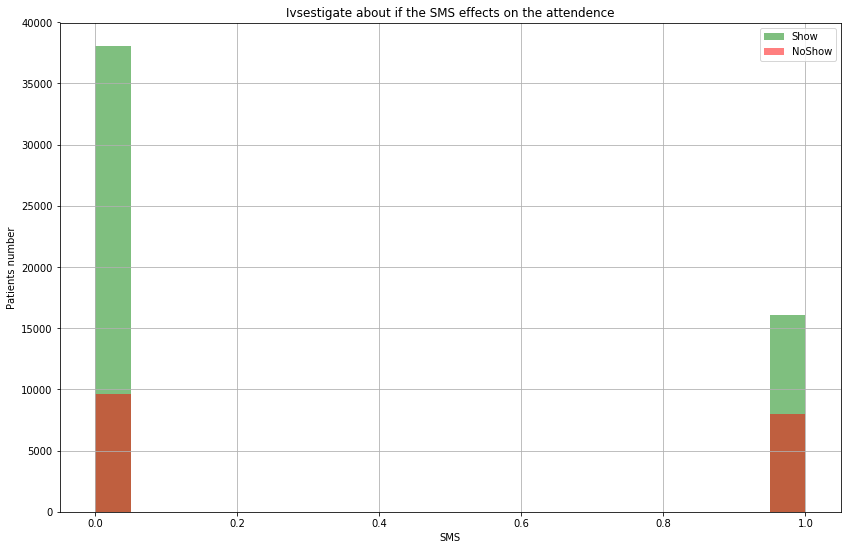

In [10]:
# ivsestigate about if the reciving SMS effects on the attendence
plt.figure(figsize = [14,9])
df.SMS_received[Show].hist(alpha = 0.5 , bins = 20 , color = 'green' , label = 'Show')
df.SMS_received[NoShow].hist(alpha = 0.5 , bins = 20 , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Ivsestigate about if the SMS effects on the attendence')
plt.xlabel('SMS')
plt.ylabel('Patients number');

The number of Show patients without receiving SMS is more than show patients with receiving SMS,it's non logical thing!

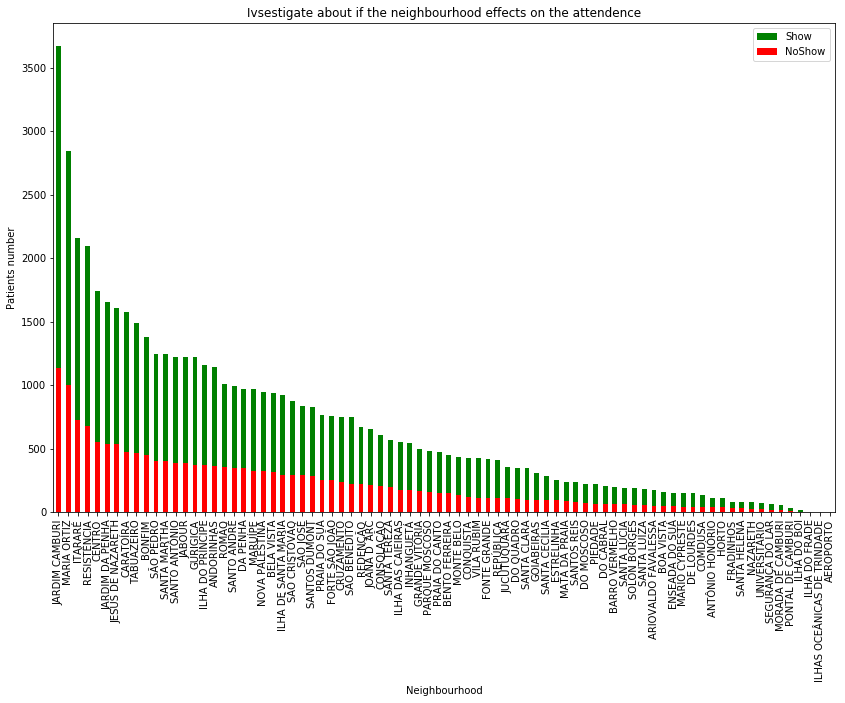

In [14]:
# ivsestigate about if the neighbourhood effects on the attendence
plt.figure(figsize = [14,9])
df.Neighbourhood[Show].value_counts().plot(kind = 'bar' , color = 'green' , label = 'Show')
df.Neighbourhood[NoShow].value_counts().plot(kind = 'bar' , color = 'red' , label = 'NoShow')
plt.legend();
plt.title('Ivsestigate about if the neighbourhood effects on the attendence')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients number');

Refrance to the graph, it shows the neighbourhood has a stong effects on attendence and JARDIM CAMBURI is the greatest number of patients.

<a id='conclusions'></a>
## Conclusions

> **The ages from 0-5 year they are the highest age attend and 63 year and above get the lowests since ages of old pepole**

> **The number of Show patients without receiving SMS is more than show patients with receiving SMS,it's non logical thing!** 

> **The neighbourhood has a stong effects on attendence and JARDIM CAMBURI is the greatest number of patients.**


## Limitations 

> **There's no clear relationship or effects between patients and some characteristics for example (gender,chronic chronic diseases and scholarship...). **

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])